In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
dt = pd.read_excel('C:\\Users\\pc\\Documents\\GitHub\\pediatric-appendicitis-diagnosis\\data\\app_data.xlsx', engine='openpyxl')

In [162]:
dt.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [163]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Severity                          781 non-null    object 
 8   Diagnosis_Presumptive             780 non-null    object 
 9   Diagnosis                         780 non-null    object 
 10  Alvarado_Score                    730 non-null    float64
 11  Paedriatic_Appendicitis_Score     730 non-null    float64
 12  Appendix

In [164]:
(dt.isnull().sum() / len(dt)) * 100

Age                                  0.127877
BMI                                  3.452685
Sex                                  0.255754
Height                               3.324808
Weight                               0.383632
Length_of_Stay                       0.511509
Management                           0.127877
Severity                             0.127877
Diagnosis_Presumptive                0.255754
Diagnosis                            0.255754
Alvarado_Score                       6.649616
Paedriatic_Appendicitis_Score        6.649616
Appendix_on_US                       0.639386
Appendix_Diameter                   36.317136
Migratory_Pain                       1.150895
Lower_Right_Abd_Pain                 1.023018
Contralateral_Rebound_Tenderness     1.918159
Coughing_Pain                        2.046036
Nausea                               1.023018
Loss_of_Appetite                     1.278772
Body_Temperature                     0.895141
WBC_Count                         

In [165]:
cleaned_dt = dt.copy()
cleaned_dt.drop(['Length_of_Stay'], axis=1, inplace=True) #Describes hospital stay after treatment, not diagnosis.
cleaned_dt.drop(['Management'], axis=1, inplace=True) #Decision made after diagnosis, not before.
cleaned_dt.drop(['Severity'], axis=1, inplace=True) #Only known after diagnosis.

In [166]:
# Loop through columns and drop columns with missing percentage >= 60%
for column in cleaned_dt.columns:
    missing_percentage = (cleaned_dt[column].isnull().sum() / len(dt)) * 100
    if missing_percentage >= 60 :
        cleaned_dt.drop([column], axis=1, inplace=True)  

In [167]:
cleaned_dt

,Age,BMI,Sex,Height,Weight,Diagnosis_Presumptive,Diagnosis,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,WBC_in_Urine,CRP,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,US_Number,Free_Fluids
0,12.680000,16.900000,female,148.0,37.0,appendicitis,appendicitis,4.0,3.0,yes,...,no,0.0,no,normal,no,yes,no,yes,882.0,no
1,14.100000,31.900000,male,147.0,69.5,appendicitis,no appendicitis,5.0,4.0,no,...,no,3.0,yes,normal,no,yes,no,yes,883.0,no
2,14.140000,23.300000,female,163.0,62.0,appendicitis,no appendicitis,5.0,3.0,no,...,no,3.0,no,constipation,no,yes,no,yes,884.0,no
3,16.370000,20.600000,female,165.0,56.0,appendicitis,no appendicitis,7.0,6.0,no,...,no,0.0,yes,normal,no,yes,no,yes,886.0,no
4,11.080000,16.900000,female,163.0,45.0,appendicitis,appendicitis,5.0,6.0,yes,...,no,0.0,no,constipation,no,yes,no,yes,887.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.413415,25.250476,female,166.5,70.0,appendicitis,appendicitis,8.0,7.0,yes,...,NaN,71.0,no,diarrhea,local,yes,NaN,yes,126.0,no
778,17.092402,20.429418,female,158.0,51.0,appendicitis,appendicitis,5.0,3.0,no,...,NaN,245.0,no,normal,local,no,NaN,yes,NaN,no
779,14.992471,19.909972,female,152.0,46.0,appendicitis,appendicitis,5.0,3.0,no,...,no,2.0,yes,normal,no,no,no,yes,127.0,yes
780,7.195072,14.295549,male,129.3,23.9,appendicitis,appendicitis,9.0,8.0,yes,...,no,8.0,no,normal,local,no,no,yes,128.0,yes


In [168]:
# Showing the columns withs their missing values numbers
missing_values = cleaned_dt.isnull().sum()
missing_values = missing_values[missing_values > 0] 
print(missing_values)

Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Diagnosis_Presumptive                 2
Diagnosis                             2
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  26
Thrombocyte_Count                    18


In [169]:
# Creating new column to group ages.
bins = [0,5,10,15,20]
labels = ["Moins de 5 ans", "Entre 5 et 10 ans", "Entre 10 et 15 ans", "Entre 15 et 20 ans"]
cleaned_dt["category_age"] = pd.cut(cleaned_dt["Age"], bins=bins, labels=labels)

In [170]:
(dt.isnull().sum() / len(dt)) * 100

Age                                  0.127877
BMI                                  3.452685
Sex                                  0.255754
Height                               3.324808
Weight                               0.383632
Length_of_Stay                       0.511509
Management                           0.127877
Severity                             0.127877
Diagnosis_Presumptive                0.255754
Diagnosis                            0.255754
Alvarado_Score                       6.649616
Paedriatic_Appendicitis_Score        6.649616
Appendix_on_US                       0.639386
Appendix_Diameter                   36.317136
Migratory_Pain                       1.150895
Lower_Right_Abd_Pain                 1.023018
Contralateral_Rebound_Tenderness     1.918159
Coughing_Pain                        2.046036
Nausea                               1.023018
Loss_of_Appetite                     1.278772
Body_Temperature                     0.895141
WBC_Count                         

In [171]:
# Define missing value thresholds
min_missing_threshold = 0.10  # 10%
max_missing_threshold = 0.6  # 60%

missing_percentage = cleaned_dt.isnull().mean()

# Selecting columns with missing values between 10% and 60%
selected_columns = missing_percentage[(missing_percentage >= min_missing_threshold) & (missing_percentage <= max_missing_threshold)].index

categorical_columns = [col for col in selected_columns if cleaned_dt[col].dtype == 'object']
numerical_columns = [col for col in selected_columns if cleaned_dt[col].dtype in ['float64', 'int64']]

# Process categorical "Yes/No" columns
for column in categorical_columns:
    if cleaned_dt[column].dropna().isin(['Yes', 'No']).all():
        cleaned_dt[column] = cleaned_dt[column].map({'Yes': 1, 'No': 0})

        cleaned_dt[column] = cleaned_dt.groupby(['Diagnosis', 'category_age'])[column].transform(lambda x: x.fillna(x.median()))
        cleaned_dt[column] = cleaned_dt[column].map({1: 'Yes', 0: 'No'})

# Process numerical columns
for column in numerical_columns:
    cleaned_dt[column] = cleaned_dt.groupby(['Diagnosis', 'category_age'])[column].transform(lambda x: x.fillna(x.median()))

print(cleaned_dt.isnull().sum())


Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Diagnosis_Presumptive                 2
Diagnosis                             2
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                     3
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage                 3
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  26
Thrombocyte_Count                    18


In [172]:
cleaned_dt

,Age,BMI,Sex,Height,Weight,Diagnosis_Presumptive,Diagnosis,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,CRP,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,US_Number,Free_Fluids,category_age
0,12.680000,16.900000,female,148.0,37.0,appendicitis,appendicitis,4.0,3.0,yes,...,0.0,no,normal,no,yes,no,yes,882.0,no,Entre 10 et 15 ans
1,14.100000,31.900000,male,147.0,69.5,appendicitis,no appendicitis,5.0,4.0,no,...,3.0,yes,normal,no,yes,no,yes,883.0,no,Entre 10 et 15 ans
2,14.140000,23.300000,female,163.0,62.0,appendicitis,no appendicitis,5.0,3.0,no,...,3.0,no,constipation,no,yes,no,yes,884.0,no,Entre 10 et 15 ans
3,16.370000,20.600000,female,165.0,56.0,appendicitis,no appendicitis,7.0,6.0,no,...,0.0,yes,normal,no,yes,no,yes,886.0,no,Entre 15 et 20 ans
4,11.080000,16.900000,female,163.0,45.0,appendicitis,appendicitis,5.0,6.0,yes,...,0.0,no,constipation,no,yes,no,yes,887.0,no,Entre 10 et 15 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.413415,25.250476,female,166.5,70.0,appendicitis,appendicitis,8.0,7.0,yes,...,71.0,no,diarrhea,local,yes,NaN,yes,126.0,no,Entre 10 et 15 ans
778,17.092402,20.429418,female,158.0,51.0,appendicitis,appendicitis,5.0,3.0,no,...,245.0,no,normal,local,no,NaN,yes,NaN,no,Entre 15 et 20 ans
779,14.992471,19.909972,female,152.0,46.0,appendicitis,appendicitis,5.0,3.0,no,...,2.0,yes,normal,no,no,no,yes,127.0,yes,Entre 10 et 15 ans
780,7.195072,14.295549,male,129.3,23.9,appendicitis,appendicitis,9.0,8.0,yes,...,8.0,no,normal,local,no,no,yes,128.0,yes,Entre 5 et 10 ans


In [173]:
cleaned_dt.dropna(how='all', inplace=True) # Completely empty row 

In [174]:
from sklearn.impute import KNNImputer

small_missing_threshold = 0.10 

missing_percentage = cleaned_dt.isnull().mean()

knn_columns = missing_percentage[missing_percentage < small_missing_threshold].index

knn_numeric_columns = [col for col in knn_columns if cleaned_dt[col].dtype in ['float64', 'int64']]

if knn_numeric_columns:
    imputer = KNNImputer(n_neighbors=3)  
    cleaned_dt[knn_numeric_columns] = imputer.fit_transform(cleaned_dt[knn_numeric_columns])

print("Valeurs manquantes après KNN (numériques) :")
print(cleaned_dt[knn_numeric_columns].isnull().sum())


Valeurs manquantes après KNN (numériques) :
Age                              0
BMI                              0
Height                           0
Weight                           0
Alvarado_Score                   0
Paedriatic_Appendicitis_Score    0
Appendix_Diameter                0
Body_Temperature                 0
WBC_Count                        0
Neutrophil_Percentage            0
RBC_Count                        0
Hemoglobin                       0
RDW                              0
Thrombocyte_Count                0
CRP                              0
US_Number                        0
dtype: int64


In [175]:
# Checking for missing values in each column
missing_values = cleaned_dt.isnull().sum()

# Displaying only columns that have missing values
missing_values = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_values)


Columns with missing values:
Sex                                   1
Diagnosis_Presumptive                 1
Diagnosis                             1
Appendix_on_US                        4
Migratory_Pain                        8
Lower_Right_Abd_Pain                  7
Contralateral_Rebound_Tenderness     14
Coughing_Pain                        15
Nausea                                7
Loss_of_Appetite                      9
Neutrophilia                         49
Ketones_in_Urine                    199
RBC_in_Urine                        205
WBC_in_Urine                        198
Dysuria                              28
Stool                                16
Peritonitis                           8
Psoas_Sign                           36
Ipsilateral_Rebound_Tenderness      162
US_Performed                          3
Free_Fluids                          62
category_age                          1
dtype: int64


In [176]:
for col in ['Sex', 'Diagnosis_Presumptive', 'Diagnosis', 'Appendix_on_US', 'US_Performed', 'category_age']:
    cleaned_dt[col].fillna(cleaned_dt[col].mode()[0], inplace=True)

In [177]:
for col in ['Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
            'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Dysuria',
            'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness']:
    cleaned_dt[col].fillna(cleaned_dt[col].mode()[0], inplace=True)


In [178]:
cleaned_dt['Neutrophilia'] = pd.to_numeric(cleaned_dt['Neutrophilia'], errors='coerce')
cleaned_dt['Ketones_in_Urine'] = pd.to_numeric(cleaned_dt['Ketones_in_Urine'], errors='coerce')
cleaned_dt['RBC_in_Urine'] = pd.to_numeric(cleaned_dt['RBC_in_Urine'], errors='coerce')
cleaned_dt['WBC_in_Urine'] = pd.to_numeric(cleaned_dt['WBC_in_Urine'], errors='coerce')
cleaned_dt['Stool'] = pd.to_numeric(cleaned_dt['Stool'], errors='coerce')
cleaned_dt['Free_Fluids'] = pd.to_numeric(cleaned_dt['Free_Fluids'], errors='coerce')


In [179]:
# List of numerical columns with missing values
numerical_cols = ['Neutrophilia', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'Stool', 'Free_Fluids']

# Perform median imputation grouped by 'Diagnosis' and 'category_age'
for col in numerical_cols:
    cleaned_dt[col] = cleaned_dt.groupby(['Diagnosis', 'category_age'])[col].transform(lambda x: x.fillna(x.median()))


In [180]:
# Check if there are still missing values in the dataset
print("Remaining missing values:")
print(cleaned_dt.isnull().sum())

Remaining missing values:
Age                                   0
BMI                                   0
Sex                                   0
Height                                0
Weight                                0
Diagnosis_Presumptive                 0
Diagnosis                             0
Alvarado_Score                        0
Paedriatic_Appendicitis_Score         0
Appendix_on_US                        0
Appendix_Diameter                     0
Migratory_Pain                        0
Lower_Right_Abd_Pain                  0
Contralateral_Rebound_Tenderness      0
Coughing_Pain                         0
Nausea                                0
Loss_of_Appetite                      0
Body_Temperature                      0
WBC_Count                             0
Neutrophil_Percentage                 0
Neutrophilia                        781
RBC_Count                             0
Hemoglobin                            0
RDW                                   0
Thrombocyte_Co

In [181]:
missing_columns = cleaned_dt.columns[cleaned_dt.isnull().sum() > 0]
print("Columns with missing values:")
print(cleaned_dt[missing_columns].isnull().sum())

Columns with missing values:
Neutrophilia        781
Ketones_in_Urine    781
RBC_in_Urine        781
WBC_in_Urine        781
Stool               781
Free_Fluids         781
dtype: int64


In [182]:
# Dropping columns with too many missing vaues
cleaned_dt.drop(['Neutrophilia'], axis=1, inplace=True) 
cleaned_dt.drop(['Free_Fluids'], axis=1, inplace=True)
cleaned_dt.drop(['Ketones_in_Urine'], axis=1, inplace=True) 
cleaned_dt.drop(['RBC_in_Urine'], axis=1, inplace=True)
cleaned_dt.drop(['WBC_in_Urine'], axis=1, inplace=True) 
cleaned_dt.drop(['Stool'], axis=1, inplace=True)

In [183]:
# Get columns with missing values and display the count of missing values in each
missing_data_count = cleaned_dt.isnull().sum()
print(missing_data_count)


Age                                 0
BMI                                 0
Sex                                 0
Height                              0
Weight                              0
Diagnosis_Presumptive               0
Diagnosis                           0
Alvarado_Score                      0
Paedriatic_Appendicitis_Score       0
Appendix_on_US                      0
Appendix_Diameter                   0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
RBC_Count                           0
Hemoglobin                          0
RDW                                 0
Thrombocyte_Count                   0
CRP                                 0
Dysuria                             0
Peritonitis 

In [184]:
# Count the total number of missing values in the entire dataset
total_missing_values = cleaned_dt.isnull().sum().sum()

print(f"Total number of missing values in the dataset: {total_missing_values}")


Total number of missing values in the dataset: 0


In [185]:
# Handling outliers using the Interquartile Range (IQR)
def detect_outliers_iqr(cleaned_dt, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = cleaned_dt[col].quantile(0.25)
        Q3 = cleaned_dt[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices[col] = cleaned_dt[(cleaned_dt[col] < lower_bound) | (cleaned_dt[col] > upper_bound)].index.tolist()
    return outlier_indices


In [186]:

# Assuming your target variable is named "diagnosis" (change if needed)
class_counts = cleaned_dt["Diagnosis"].value_counts()
print(class_counts)

# Percentage distribution
class_percentage = cleaned_dt["Diagnosis"].value_counts(normalize=True) * 100
print(class_percentage)


Diagnosis
appendicitis       464
no appendicitis    317
Name: count, dtype: int64
Diagnosis
appendicitis       59.411012
no appendicitis    40.588988
Name: proportion, dtype: float64


In [187]:
# The data frame is balanced

In [188]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical columns
categorical_cols = cleaned_dt.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    cleaned_dt[col] = LabelEncoder().fit_transform(cleaned_dt[col])

# Compute correlation again
correlation_matrix = cleaned_dt.corr()


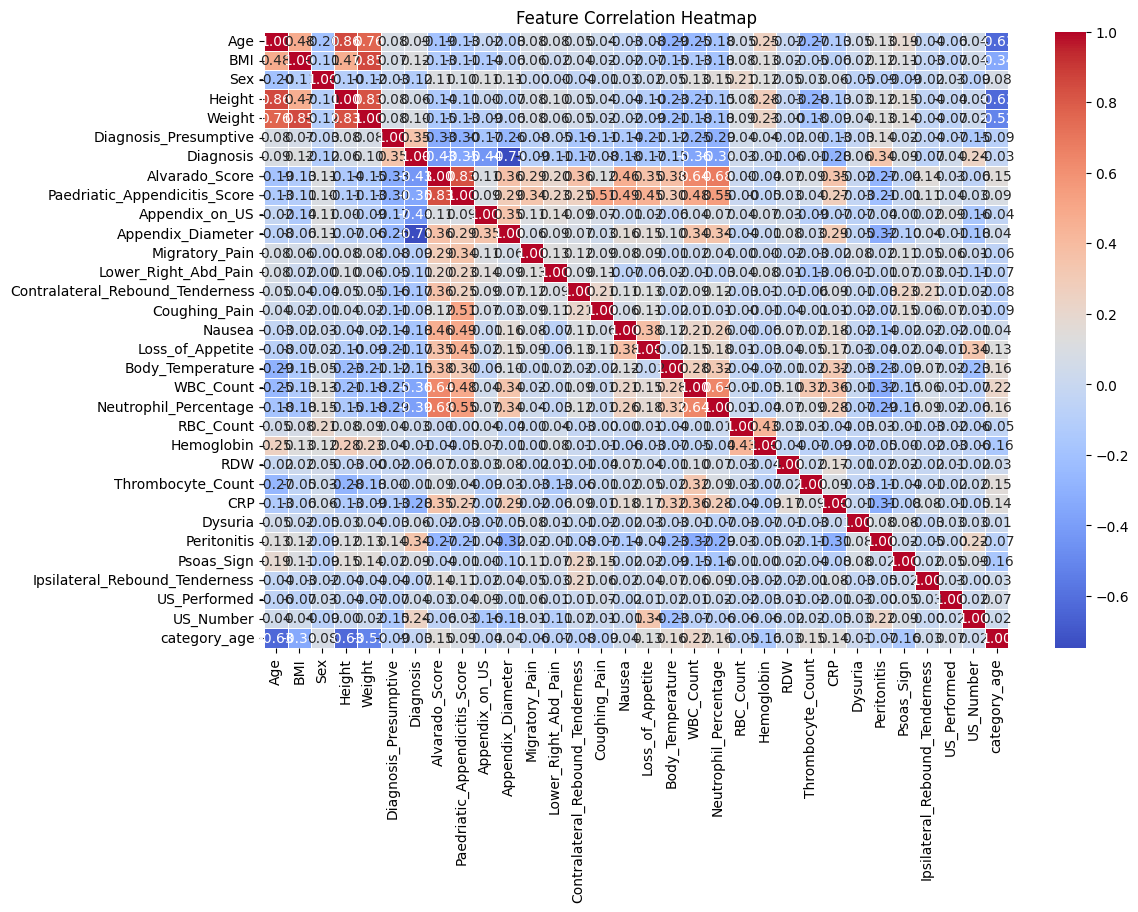

In [189]:
# Dealing with correlation
# Compute correlation matrix
correlation_matrix = cleaned_dt.corr()

# Display correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


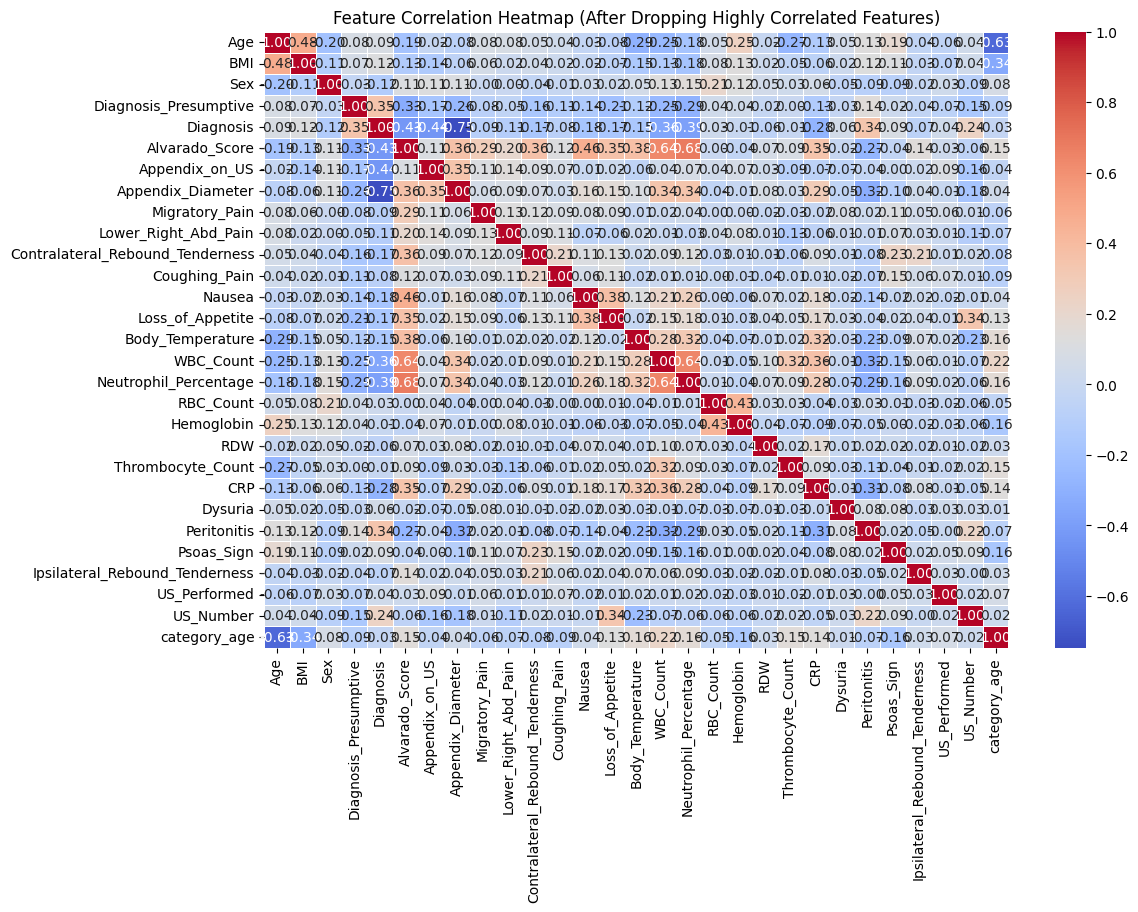

Dropped highly correlated features: {'Weight', 'Height', 'Paedriatic_Appendicitis_Score'}


In [190]:
categorical_cols = cleaned_dt.select_dtypes(exclude=['number']).columns

for col in categorical_cols:
    cleaned_dt[col] = LabelEncoder().fit_transform(cleaned_dt[col])

# Compute correlation matrix
correlation_matrix = cleaned_dt.corr()

# Identify highly correlated features
threshold = 0.8
to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

# Drop the identified features
cleaned_dt = cleaned_dt.drop(columns=to_drop)

# Display updated correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_dt.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (After Dropping Highly Correlated Features)")
plt.show()

# Print dropped columns
print(f"Dropped highly correlated features: {to_drop}")

In [191]:
# Saving the cleaned data 
cleaned_dt.to_excel('C:\\Users\\pc\\Documents\\GitHub\\pediatric-appendicitis-diagnosis\\data\\cleaned_data.xlsx', index=False)